In [1]:
#    Gather data from Bing image downloader
 
!pip install bing-image-downloader
!mkdir image

In [2]:
from bing_image_downloader import downloader

downloader.download('black dogs', limit=10,output_dir='image')
downloader.download('red roses', limit=10,output_dir='image')



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://buzzsharer.com/wp-content/uploads/2015/07/cute-pointer-eyes.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.hdwallpapers.in/download/aiden_pearce_in_watch_dogs-1366x768.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/736x/1b/35/78/1b3578f342bbbb849031a3721c034cc4--black-german-shepherd-puppies-black-german-shepherds.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.hdwallpapers.in/download/watch_dogs_aiden_pearce-1920x1080.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://buzzsharer.com/wp-content/uploads/2015/04/Labrador-Retriever-puppy-1.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.aspca.org/sites/default/files/styles/medium_image_300x200/public/field/image/plants/indian-rubber-plant-r.jpg?itok=lzXXOH-s
[%] File Downloaded !

[%] Downloading Image #7 from https://www.hdwallpapers.i

In [3]:
# Processing


import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import os
 
target=[]
images=[]
flat_data=[]

DATADIR='/content/image'
CATEGORIES=['black dogs','red roses']
for category in CATEGORIES:
  class_num=CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array= imread(os.path.join(path,img))
    #print(img_array.shape)
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

flat_data

array([[0.62313725, 0.59568627, 0.59713725, ..., 0.57619608, 0.60784314,
        0.62627451],
       [0.5675817 , 0.11891503, 0.72156863, ..., 0.05098039, 0.00784314,
        0.01960784],
       [0.00392157, 0.02354196, 0.04356915, ..., 0.01152941, 0.02742484,
        0.03941229],
       ...,
       [0.43300654, 0.        , 0.00392157, ..., 0.48464052, 0.33464052,
        0.31699346],
       [0.62414902, 0.53485621, 0.91358519, ..., 0.70097603, 0.63905882,
        0.92807843],
       [0.13693769, 0.17615338, 0.07811416, ..., 0.13333333, 0.22745098,
        0.1235329 ]])

<BarContainer object of 2 artists>

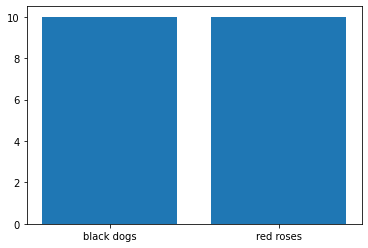

In [4]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [5]:
#split data into training and testing
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(flat_data,target,test_size=0.3,random_state=109)

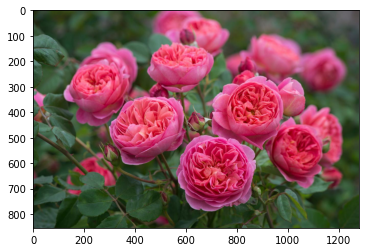

In [6]:
plt.imshow(img_array)

In [7]:
#training

from sklearn.model_selection import GridSearchCV
from sklearn import svm

train_x, test_x, train_y,test_y=train_test_split(flat_data,target,test_size=0.4,random_state=109)

param_grid=[{'C':[1,10,100,1000],'kernel':['linear']},
                     {'C':[1,10,100,1000],'gamma' :[0.001,0.0001],'kernel':['rbf'] }   ]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(train_x,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [8]:
pred_y=clf.predict(test_x)
pred_y

array([1, 0, 0, 0, 0, 1, 0, 0])

In [9]:
test_y

array([1, 1, 0, 0, 1, 1, 1, 0])

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(pred_y,test_y)

0.625

In [11]:
confusion_matrix(pred_y,test_y)

array([[3, 3],
       [0, 2]])

In [12]:
import pickle
pickle.dump(clf,open('img_Classification.p','wb'))

In [13]:
model=pickle.load(open('img_Classification.p','rb'))

urlhttps://i0.wp.com/ideasfornames.com/wp-content/uploads/2019/11/cute-pet_t20_KoZno3.jpg?ssl=1.jpg
(640, 960, 3)


ValueError: ignored

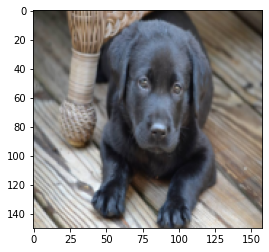

In [33]:
flat_data=[ ]
url =input('url')
img = imread(url)
img_resized =resize(img, (150, 158,3))
flat_data.append(img_resized.flatten())
flat_data= np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y =model.predict(flat_data)
y= CATEGORIES[y[0]]
print(f' PREDICTED OUTPUT : {y}')

In [14]:
 
import tensorflow as tf 
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
 
# create a new generator
imagegen = ImageDataGenerator()
# load train data
train = imagegen.flow_from_directory("/content/image", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))
# load val data
val = imagegen.flow_from_directory("/content/image", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [15]:
# Deployment
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok 
!pip install streamlit-drawable-canvas --quiet

     |████████████████████████████████| 8.2MB 7.3MB/s 
     |████████████████████████████████| 4.2MB 41.0MB/s 
     |████████████████████████████████| 174kB 49.3MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
     |████████████████████████████████| 112kB 51.5MB/s 
     |████████████████████████████████| 122kB 27.5MB/s 
     |████████████████████████████████| 71kB 9.5MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
     |████████████████████████████████| 1.3MB 7.7MB/s 


In [24]:
%%writefile app.py
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import streamlit as st
import pickle
from PIL import  Image

model=pickle.load(open('img_Classification.p','rb'))
uploaded_file=st.file_uploader("choose an image",type="jpg")
 
st.text('uplode the image')
if uploaded_file is not None:
        img=Image.open(uploaded_file)
        st.image(img,caption=('uploadede image'))
 
if st.button("PREDICT"):
 CATEGORIES= ['dogs', 'rose']
 st.write('Result...')
 flat_data=[]
 img =np.array(img)
 img_resized =resize(img, (150, 158,3))
 flat_data.append(img_resized.flatten())
 flat_data= np.array(flat_data)
 y =model.predict(flat_data)
 y= CATEGORIES[y[0]]
 st.tittle(f' PREDICTED OUTPUT : {y}')

Overwriting app.py


In [17]:
!nohup streamlit run app.py & # for run it in command line ,& is for running this in backround
url=ngrok.connect(port = '8501') #port for tuneling
print(url)

nohup: appending output to 'nohup.out'
http://35469d11f2a7.ngrok.io
